# Definição do agente do jogo Pacman

Baseamos nossa escolha de agente como um pacman que decide o próximo passo a ser dado ao analisar em seu estado atual qual a posição de todos os fantasmas, do fantasma mais próximo, das comidas dentro de um raio e da comida mais próxima.

In [1]:
from pacman import GameState,readCommand
from collections import Counter
from game import Agent
from game import Directions
from util import manhattanDistance
from heuristic import heuristicDistance
import seaborn as sns
import pacman
import random
import numpy as np
from copy import deepcopy
import matplotlib.pyplot as plt
class theBestAgentOnEarth(Agent):
    '''O melhor agente da Terra que recebe pesos para a relevância de funções de busca, como
    a posição da melhor comida, do fantasma mais próximo, etc, para calcular o próximo passo do Agente'''
    
    def __init__(self,weights):
        self.weights = weights
        
    def registerInitialState(self, state):
        return    
    
    
    
    def getAction(self,state):
        
        def dirComida(state,weight1,weight2,lado_quadrado):
            '''Função que recebe dois pesos e um número. Ela verifica por comida num quadrado em torno do pacman.
            A função recebe o tamanho do lado do quadrado. Ela retorna a direção em que mais comidas estão nesse
            quadrado (Oeste,Leste,Norte, Sul), ponderada pelo peso 1 e a direção da comida mais próxima ponderada
            pelo peso 2.'''
            east=west=north=south=0 #inicializando as variaveis para contar as direções mais frequentes
            best_east=best_west=best_north=best_south=0 #inicializando as variaveis para as direções
                                                        #da comida mais próxima
            near_x=near_y=0
            near_food=10000
            #Cria o quadrado ladoxlado em volta do pacman para checar se tem comida e qual a direção da comida
            for eixo_x in range(int(-(lado_quadrado/2)),int((lado_quadrado/2)+1)):
                for eixo_y in range(int(-(lado_quadrado/2)),int((lado_quadrado/2)+1)):
                    try:
                        #Se tem muro, vai para outro quadrado
                        if state.hasWall(state.getPacmanPosition()[0]+eixo_x,state.getPacmanPosition()[1]+eixo_y):
                            continue
                        else:
                            #Se não tem muro, atualiza o x e y do quadrado
                            x = state.getPacmanPosition()[0]+eixo_x
                            y = state.getPacmanPosition()[1]+eixo_y
                            has_food = state.getFood()[x][y]
                            #Verifica se tem comida no quadrado e adiciona a direção mais forte(sul,norte,leste,oeste)
                            if has_food:
                                #Ve se é a comida mais proxima, se for irá armazenar as direções para o weight 2
                                #Utilizamos a distância de Manhattan pra ver qual comida é a mais próxima
                                dist=manhattanDistance(state.getPacmanPosition(),[x,y])
                                if dist<near_food:
                                    near_food=dist
                                    near_x= x
                                    near_y= y
                                    #Aqui vereficamos o maior eixo e o sinal. Se for,por exemplo, eixo x e sinal 
                                    #positivo, será direção oeste. Se for o mesmo eixo e sinal contrário, será 
                                    #direção este. Do mesmo modo se o eixo y for o maior, será norte se for
                                    #positivo e sul se for negativo
                                    if abs(eixo_x)>abs(eixo_y) and eixo_x<0:
                                        best_west = 0
                                        best_west += 1
                                    elif abs(eixo_x)>abs(eixo_y) and eixo_x>0:
                                        best_east=0
                                        best_east += 1
                                    elif abs(eixo_y)>abs(eixo_x) and eixo_y<0:
                                        best_south=0
                                        best_south += 1
                                    elif abs(eixo_y)>abs(eixo_x) and eixo_y>0:
                                        best_north=0
                                        best_north += 1
                                    elif abs(eixo_y)==abs(eixo_x) and eixo_y>0 and eixo_x>0:
                                        best_north=best_east=0
                                        best_north += 1
                                        best_east += 1
                                    elif abs(eixo_y)==abs(eixo_x) and eixo_y>0 and eixo_x<0:
                                        best_north=best_west=0
                                        best_north += 1
                                        best_west += 1
                                    elif abs(eixo_y)==abs(eixo_x) and eixo_y<0 and eixo_x>0:
                                        best_south=best_east=0
                                        best_south += 1
                                        best_east += 1
                                    elif abs(eixo_y)==abs(eixo_x) and eixo_y<0 and eixo_x<0:
                                        best_south=best_west=0
                                        best_south += 1
                                        best_west += 1
                                #Depois de vermos se é a comida mais próxima, agora checamos a mesma coisa para
                                #as demais comidas. Mesmo se for a comida mais próxima, ela entrará na conta da
                                #comida total.
                                if abs(eixo_x)>abs(eixo_y) and eixo_x<0:
                                    west += 1
                                elif abs(eixo_x)>abs(eixo_y) and eixo_x>0:
                                    east += 1
                                elif abs(eixo_y)>abs(eixo_x) and eixo_y<0:
                                    south += 1
                                elif abs(eixo_y)>abs(eixo_x) and eixo_y>0:
                                    north += 1
                                elif abs(eixo_y)==abs(eixo_x) and eixo_y>0 and eixo_x>0:
                                    north += 1
                                    east += 1
                                elif abs(eixo_y)==abs(eixo_x) and eixo_y>0 and eixo_x<0:
                                    north += 1
                                    west += 1
                                elif abs(eixo_y)==abs(eixo_x) and eixo_y<0 and eixo_x>0:
                                    south += 1
                                    east += 1
                                elif abs(eixo_y)==abs(eixo_x) and eixo_y<0 and eixo_x<0:
                                    south += 1
                                    west += 1                            
                    except:
                        continue
                        
            #Agora que fizemos a contagem das direções, a função retorna
            #dois dicionários, um para a comida mais próxima e outro para o total de comidas.
            # Cada dicionário contém todas as direções como keys e a contagem das direções, já ponderada
            #pelo reespectivos pesos, 1 e 2 (Peso 1 para a comida total e peso 2 para a comida mais próxima).
            actions_count_all={'East':weight1*east,'West':weight1*west,'North':weight1*north,'South':weight1*south}
            
            actions_count_near={'East':weight2*best_east,'West':weight2*best_west,
                                'North':weight2*best_north,'South':weight2*best_south}
            return actions_count_all , actions_count_near
        
        def futureBestState(state,legal,weight):
            dic = {'East':0,'West':0,'North':0,'South':0}
            score_list = [0,0,0,0]
            for action in dic.keys():
                if action in legal:
                    score = state.generatePacmanSuccessor(action).getScore()
                    dic[action]=score*weight
            return dic
        def dirNearGhost(state,weight):
            '''Função que recebe um peso, verifica pelo fantasma mais perto e retorna direção oposta ponderada
            pelo peso recebido.'''
            
            east=west=north=south=0 #inicializando as variaveis para contar as direções mais frequentes
            numGhost = state.getNumAgents() #Número de fantasmas
            near_dist = 10000 #Estabelecendo um valor de distância alto para ser substituido
            #função que busca o fantasma mais perto, baseado na distância de manhattan
            for ghost in range(1,numGhost):
                dist=manhattanDistance(state.getPacmanPosition(),state.getGhostPosition(ghost))
                if dist<near_dist:
                    near_dist=dist
                    near_ghost=ghost
            #Selecionamos agora a direção do fantasma mais proximo
            x,y=heuristicDistance(state.getPacmanPosition(),state.getGhostPosition(near_ghost))
            #Aqui inevertemos a melhor direção, para o pacman ir para uma direção oposta do fantasma
            if abs(x)>abs(y):
                if x>0:
                    east += 1
                else:
                    west += 1
                    
            elif abs(x)==abs(y):
                if x>0:
                    east += 1
                    north += 1
                else:
                    west += 1
                    south += 1
            else:
                if y>0:
                        north += 1
                else:
                        south += 1
            #Retornamos um dicionário com todas as direções como key e a contagem, já ponderada pelo peso,
            #como values                         
            actions_count={'East':weight*east,'West':weight*west,'North':weight*north,'South':weight*south}
            return actions_count
         
        def dirAllGhost(state,weight):
            '''Função que recebe um peso, verifica os fantasmas e retorna a direção oposta da somatória dos fantasmas
            ponderada pelo peso passado na função.'''
           
            east=west=north=south=0 #inicializando as variaveis para contar as direções mais frequentes
            numGhost = state.getNumAgents() #Número de fantasmas. Sabemos que o pacman é contado aqui, mas não importa
                                            # porque na função range() utilizada abaixo começamos no 1, e não no zero

            for ghost in range(1,numGhost):
                x,y=heuristicDistance(state.getPacmanPosition(),state.getGhostPosition(ghost))
                #Aqui inevertemos a melhor direção, para o pacman ir para uma direção oposta ao do fantasma
                if abs(x)>abs(y):
                    if x>0:
                        east += 1
                    else:
                        west += 1
                    
                elif abs(x)==abs(y):
                    if x>0:
                        east += 1
                        north += 1
                    else:
                        west += 1
                        south += 1
                else:
                    if y>0:
                        north += 1
                    else:
                        south += 1
            #Retornamos um dicionário com todas as direções como key e a contagem, já ponderada pelo peso,
            #como values            
            actions_count={'East':weight*east,'West':weight*west,'North':weight*north,'South':weight*south}
            return actions_count
        
        #Agora iniciamos a função getAction, retirando um dos cromossomos do indivíduo (cada
        #passo dado pelo indivíduo no jogo, ponderada pelos pesos). Ou seja, o gene contém a lista de pesos
        #para cada uma das funções estabelecidas: peso 1 dado para a melhor direção para comidas, peso dois 
        #para a melhor direção para comida mais próxima, peso três para a direção oposta
        # de todos os fantasmas e direção oposta do fantasma mais próximo.
        try:
            gene=self.weights.pop(0) #Retira um gene da lista de passos
        except:
            return Directions.STOP
        legal = state.getLegalPacmanActions() #Verifica as ações legais do agente
        tentativas=0 #Inicializa a variável de tentativas para achar a melhor direção dado os pesos
        lado_quadrado=2 #Inicializa o tamanho do lado do quadrado do pacman para a busca da comida
        food = state.getNumFood()
        while tentativas<15 and food > 10:#Tenta 15 vezes encontrar alguma direção ou ate faltar 10 comidas
            tentativas+=1 #Vamos contando o número de tentativas
            lado_quadrado+=2 #A cada tentativa, aumentamos o quadrado de busca por comida
            #Vemos o dicionário de ações para a melhor comida e para todas as comidas
            all_food_best_dir, near_food_best_dir = dirComida(state,int(gene[0]),int(gene[1]),lado_quadrado)
            #Vemos o dicionário de ações para o fantasma mais próximo e todos os fantasmas
            all_ghost_best_dir = dirAllGhost(state,int(gene[2]))
            near_ghost_best_dir = dirNearGhost(state,int(gene[3]))
            best_future_action = futureBestState(state,legal,int(gene[4]))
            final = dict(Counter(all_food_best_dir) + Counter(near_food_best_dir) + 
                     Counter(all_ghost_best_dir)+
                     Counter(near_ghost_best_dir)+
                     Counter(best_future_action))
            final = dict(sorted(final.items(), key=lambda item: item[1],reverse=True))
            for i in range(len(final)):
                melhor_direcao = list(final.keys())[i]
                if melhor_direcao in legal:
                    return melhor_direcao
        #Se nenhuma dessas tentativas derem certo, para evitar erro, retornamos uma direção aleatória dentre
        # as direções legais dos agentes
        all_food_best_dir, near_food_best_dir = dirComida(state,int(gene[0]),int(gene[1]),lado_quadrado)
        best_future_action = futureBestState(state,legal,int(gene[4]))
        final = dict(Counter(near_food_best_dir) + Counter(best_future_action))
        final = dict(sorted(final.items(), key=lambda item: item[1],reverse=True))
        for i in range(len(final)):
            melhor_direcao = list(final.keys())[i]
            if melhor_direcao in legal:
                return melhor_direcao
        final = dict(sorted(near_food_best_dir.items(), key=lambda item: item[1],reverse=True))
        if list(final.keys())[0] in legal:
            return list(final.keys())[0]
        return random.choice(legal)

In [2]:
def generateGene():
    '''Função que retorna um gene. Ela gera uma lista com 5 números de 0 a 100 criados aleatoriamente'''
    gene=[]
    for weight in range(0,5):
        gene.append(random.uniform(0, 100))
    return gene
def generateIndividuo():
    '''Função que retorna um indivíduo. Ela gera um indivíduo com 2000 passos, valor suficiente para resolver
    até o layout mais complexo do pacman.'''
    individuo=[]
    for jogadas in range(0,1000):
        individuo.append(generateGene())
    return individuo
def generatePopulation(size):
    '''Função que recebe o layout do jogo e um tamanho e cria uma população de indivíduos. Ela
    retorna duas listas, a população e os scores de cada indivíduo. O score na posição 0 da lista será do 
    indivíduo da população na posição 0.'''
    population=[]
    for i in range(0,size):
        individuo = generateIndividuo()
        individuo_temp=individuo #Passamos para uma variável temporária pois o .pop(0)do getAction
                                    #remove os passos dados dos indivíduos
        population.append(individuo)
    return population

def pacmanAvarageScore(individuo,num_tentativas,flag):
    '''Função que recebe o indivíduo, a quantidade de jogos que ele irá realizar e o layout do jogo.
    Ela retorna o score médio da quantidade de jogos realizados para esse indivíduo.'''
    tentativas_ind=[]
    layouts=['smallClassic']
    for layout in layouts:
        for tentativas in range(0,num_tentativas):
            if flag:
                args = ['--layout',layout,'--pacman','DumbAgent','-q']
            else:
                args = ['--layout',layout,'--pacman','DumbAgent']
            args_list = readCommand(args)
            test = theBestAgentOnEarth(individuo)
            score= pacman.runGames(pacman=test,layout=args_list['layout'],ghosts=args_list['ghosts'],display=args_list['display'],
                           numGames=args_list['numGames'],record=args_list['record'])
            tentativas_ind.append(score)
    return np.mean(tentativas_ind)

def evaluatePopulation(population,flag):
    '''Função que recebe o layout do jogo e um tamanho e cria uma população de indivíduos. Ela
    retorna duas listas, a população e os scores de cada indivíduo. O score na posição 0 da lista será do 
    indivíduo da população na posição 0.'''
    scores=[]
    for i in range(0,len(population)):
        print('individuo ',i+1)
        individuo = population[i]
        individuo_temp=deepcopy(individuo) #Passamos para uma variável temporária pois o .pop(0)do getAction
                                    #remove os passos dados dos indivíduos
        avg_score = pacmanAvarageScore(individuo_temp,5,flag)
        scores.append(avg_score)
    return scores

def mutation(population,rate):
    '''Função que recebe uma população e uma taxa e define uma porcentagem da população para realizar mutação
    de cromossomos nos seus indivíduos da essa taxa recebida'''
    for selected in range(int(len(population)*rate)): #Seleciona uma quantidade x de indivíduos, dado a rate
        position_individual = random.randint(0,len(population)-1) #seleciona um indivíduo aleatório na população
        position_cromossom1 = random.randint(0,len(population[position_individual])-1)#Seleciona um cromossomo aleatório
        position_cromossom2 = random.randint(0,len(population[position_individual])-1)#Seleciona outro cromossomo aleatório
        crom1 = population[position_individual][position_cromossom1]
        crom2 = population[position_individual][position_cromossom2]
        
        population[position_individual][position_cromossom1] = crom2
        population[position_individual][position_cromossom2] = crom1
    return population
        
def crossover(pairs,range_cromossomos,aleatorio):
    '''Função que recebe um pair [score, população] e uma taxa e um range de valores e define uma porcentagem da população
    para realizar crossover desse range de valores (recebido pela função) para os cromossomos dos indivíduos'''
    
    for selected in range(len(pairs)): #Seleciona um individuo de vez da pop
        
        position_individual1 = random.randint(0,len(pairs)-1) #seleciona um indivíduo 1 aleatório na população
        position_individual2 = random.randint(0,len(pairs)-1) #seleciona um indivíduo 2 aleatório na população
        #Se a posicao dos indivíduos são iguais, entra num while para trocar a posicao2 
        while position_individual1 == position_individual2:
            position_individual2 = random.randint(0,len(pairs)-1) #seleciona um indivíduo 2 aleatório na população
        #Apos selecionar as posições dos indivíduos, selecionamos o range de seus primeiros cromossomos     
        crom1_list = pairs[position_individual1][1][aleatorio:aleatorio+range_cromossomos]
        crom2_list = pairs[position_individual2][1][aleatorio:aleatorio+range_cromossomos]
            
        pairs[position_individual1][1][aleatorio:aleatorio+range_cromossomos] = crom2_list
        pairs[position_individual2][1][aleatorio:aleatorio+range_cromossomos] = crom1_list
    population = [el[1] for el in pairs]
    return population

def makePairs(scores,population):
    lista=[]
    for i in range(len(population)):
        item=[scores[i], population[i]]
        lista.append(item)
    lista.sort(reverse=True, key=lambda li: li[0])
    return lista

def mergePopulationAndScores(pairs,pairs_linha):
    pop = pairs[:5] + pairs_linha[:-5]
    population = [el[1] for el in pop]
    scores = [el[0] for el in pop]
    return population, scores

# Funções para o algoritmo genético

In [2]:
def generateGene():
    '''Função que retorna um gene. Ela gera uma lista com 5 números de 0 a 100 criados aleatoriamente'''
    gene=[]
    for weight in range(0,5):
        gene.append(random.uniform(0, 100))
    return gene
def generateIndividuo():
    '''Função que retorna um indivíduo. Ela gera um indivíduo com 1000 passos, valor suficiente para resolver
    até o layout mais complexo do pacman.'''
    individuo=[]
    for jogadas in range(0,1000):
        individuo.append(generateGene())
    return individuo
def generatePopulation(size):
    '''Função que recebe o layout do jogo e um tamanho e cria uma população de indivíduos. Ela
    retorna duas listas, a população e os scores de cada indivíduo. O score na posição 0 da lista será do 
    indivíduo da população na posição 0.'''
    population=[]
    for i in range(0,size):
        individuo = generateIndividuo()
        individuo_temp=individuo #Passamos para uma variável temporária pois o .pop(0)do getAction
                                    #remove os passos dados dos indivíduos
        population.append(individuo)
    return population

def pacmanAvarageScore(individuo,num_tentativas,flag):
    '''Função que recebe o indivíduo, a quantidade de jogos que ele irá realizar e o layout do jogo.
    Ela retorna o score médio da quantidade de jogos realizados para esse indivíduo.'''
    tentativas_ind=[]
    layouts=['smallClassic']
    for layout in layouts:
        for tentativas in range(0,num_tentativas):
            if flag:
                args = ['--layout',layout,'--pacman','DumbAgent','-q']
            else:
                args = ['--layout',layout,'--pacman','DumbAgent']
            args_list = readCommand(args)
            test = theBestAgentOnEarth(individuo)
            score= pacman.runGames(pacman=test,layout=args_list['layout'],ghosts=args_list['ghosts'],display=args_list['display'],
                           numGames=args_list['numGames'],record=args_list['record'])
            tentativas_ind.append(score)
    return np.mean(tentativas_ind)

def evaluatePopulation(population,flag):
    '''Função que recebe o layout do jogo e um tamanho e cria uma população de indivíduos. Ela
    retorna duas listas, a população e os scores de cada indivíduo. O score na posição 0 da lista será do 
    indivíduo da população na posição 0.'''
    scores=[]
    for i in range(0,len(population)):
        print('individuo ',i+1)
        individuo = population[i]
        individuo_temp=deepcopy(individuo) #Passamos para uma variável temporária pois o .pop(0)do getAction
                                    #remove os passos dados dos indivíduos
        avg_score = pacmanAvarageScore(individuo_temp,5,flag)
        scores.append(avg_score)
    return scores

def mutation(population,rate):
    '''Função que recebe uma população e uma taxa e define uma porcentagem da população para realizar mutação
    de cromossomos nos seus indivíduos da essa taxa recebida'''
    for selected in range(int(len(population)*rate)): #Seleciona uma quantidade x de indivíduos, dado a rate
        position_individual = random.randint(0,len(population)-1) #seleciona um indivíduo aleatório na população
        position_cromossom1 = random.randint(0,len(population[position_individual])-1)#Seleciona um cromossomo aleatório
        position_cromossom2 = random.randint(0,len(population[position_individual])-1)#Seleciona outro cromossomo aleatório
        crom1 = population[position_individual][position_cromossom1]
        crom2 = population[position_individual][position_cromossom2]
        
        population[position_individual][position_cromossom1] = crom2
        population[position_individual][position_cromossom2] = crom1
    return population
def torneio(pairs,tournment_size):
    participantes_torneio=[]
    for number in range(tournment_size):
        position_individual = random.randint(0,len(pairs)-1)
        individuo = pairs[position_individual]
        participantes_torneio.append(individuo)
    participantes_torneio.sort(reverse=True, key=lambda li: li[0])
    return participantes_torneio[0]
def crossover(pairs,range_cromossomos,aleatorio):
    '''Função que recebe um pair [score, população] e uma taxa e um range de valores e define uma porcentagem da população
    para realizar crossover desse range de valores (recebido pela função) para os cromossomos dos indivíduos'''
    novos_pares=[]
    for i in range(int((len(pairs)*0.8)/2)): #Para 80% dosindivíduos de individuos na populacao
        
        individual1 = torneio(pairs,4) #seleciona um indivíduo 1 aleatório na população
        individual2 = torneio(pairs,4) #seleciona um indivíduo 2 aleatório na população
        #Apos selecionar as posições dos indivíduos, selecionamos o range de seus primeiros cromossomos     
        crom1_list = individual1[1][aleatorio:aleatorio+range_cromossomos]
        crom2_list = individual2[1][aleatorio:aleatorio+range_cromossomos]
            
        individual1[1][aleatorio:aleatorio+range_cromossomos] = crom2_list
        individual2[1][aleatorio:aleatorio+range_cromossomos] = crom1_list
        novos_pares.append(individual1)
        novos_pares.append(individual2)
    population = [el[1] for el in novos_pares]
    return population

def makePairs(scores,population):
    lista=[]
    for i in range(len(population)):
        item=[scores[i], population[i]]
        lista.append(item)
    lista.sort(reverse=True, key=lambda li: li[0])
    return lista

def mergePopulationAndScores(pairs,pairs_linha):
    pop = pairs[:10] + pairs_linha[:-10]
    population = [el[1] for el in pop]
    scores = [el[0] for el in pop]
    return population, scores

# Main

In [3]:
dic={}
#genetic program procedure
t = 0

# Initialize_Population P(0)
size=20
P = generatePopulation(size)
delta_score = 1
# While not (wall_condition) do
while t <= 200: #delta_score < 0.001 or 
    print('GERAÇÃO',t)
    # Evaluate_Population P(t)
    print('pais:')
    scores = evaluatePopulation(P,flag=True)
    pairs= makePairs(scores,P)
    #Duplicationof the best 25% individuals of P(t)
    pairs_duplication = pairs[:int(len(pairs)*0.2)]
    Pduplication = [el[1] for el in pairs_duplication]
    # P_cross = crossover 80% de P(t) de 100 primeiros genes
    aleatorio = np.random.randint(0,600)
    Pcrossover = crossover(pairs,100,aleatorio)
    #P'(t) = duplication + cross
    
    Plinha = Pcrossover + Pduplication
    
    Plinha = mutation(Plinha,0.1)
    # Evaluate_Population P’
    print('filhos:')
    scores_linha  = evaluatePopulation(Plinha,flag=True)
    pairs_linha = makePairs(scores_linha,Plinha)
    
    # P(t+1) = Select_s survivors P(t) from P '
    P, scores_final = mergePopulationAndScores(pairs,pairs_linha)
    dic[t] = scores_final
    t = t + 1
#End

GERAÇÃO 0
pais:
individuo  1
individuo  2
individuo  3
individuo  4
individuo  5
individuo  6
Pacman emerges victorious! Score: 896
individuo  7
Pacman emerges victorious! Score: 900
individuo  8
individuo  9
Pacman emerges victorious! Score: 1053
individuo  10
individuo  11
individuo  12
individuo  13
individuo  14
individuo  15
Pacman emerges victorious! Score: 955
individuo  16
individuo  17
individuo  18
individuo  19
Pacman emerges victorious! Score: 925
individuo  20
filhos:
individuo  1
individuo  2
individuo  3
Pacman emerges victorious! Score: 1306
individuo  4
individuo  5
individuo  6
Pacman emerges victorious! Score: 736
individuo  7
individuo  8
individuo  9
individuo  10
individuo  11
individuo  12
individuo  13
individuo  14
individuo  15
individuo  16
individuo  17
individuo  18
individuo  19
individuo  20
GERAÇÃO 1
pais:
individuo  1
individuo  2
individuo  3
individuo  4
individuo  5
Pacman emerges victorious! Score: 1103
individuo  6
individuo  7
individuo  8
individ

individuo  3
individuo  4
individuo  5
Pacman emerges victorious! Score: 921
individuo  6
individuo  7
Pacman emerges victorious! Score: 988
individuo  8
Pacman emerges victorious! Score: 970
individuo  9
individuo  10
individuo  11
Pacman emerges victorious! Score: 965
individuo  12
Pacman emerges victorious! Score: 963
individuo  13
Pacman emerges victorious! Score: 897
individuo  14
Pacman emerges victorious! Score: 979
individuo  15
individuo  16
individuo  17
individuo  18
individuo  19
individuo  20
GERAÇÃO 11
pais:
individuo  1
individuo  2
individuo  3
individuo  4
individuo  5
individuo  6
individuo  7
individuo  8
individuo  9
individuo  10
individuo  11
individuo  12
individuo  13
Pacman emerges victorious! Score: 877
individuo  14
individuo  15
individuo  16
Pacman emerges victorious! Score: 1147
individuo  17
individuo  18
individuo  19
individuo  20
filhos:
individuo  1
individuo  2
individuo  3
individuo  4
individuo  5
individuo  6
individuo  7
individuo  8
individuo  9

individuo  20
GERAÇÃO 21
pais:
individuo  1
individuo  2
individuo  3
individuo  4
individuo  5
individuo  6
individuo  7
individuo  8
individuo  9
individuo  10
individuo  11
individuo  12
individuo  13
individuo  14
individuo  15
individuo  16
individuo  17
individuo  18
individuo  19
individuo  20
filhos:
individuo  1
individuo  2
individuo  3
individuo  4
Pacman emerges victorious! Score: 955
individuo  5
individuo  6
individuo  7
individuo  8
individuo  9
Pacman emerges victorious! Score: 909
individuo  10
individuo  11
individuo  12
individuo  13
individuo  14
individuo  15
individuo  16
individuo  17
individuo  18
individuo  19
individuo  20
GERAÇÃO 22
pais:
individuo  1
individuo  2
Pacman emerges victorious! Score: 873
individuo  3
Pacman emerges victorious! Score: 921
individuo  4
individuo  5
individuo  6
individuo  7
individuo  8
individuo  9
individuo  10
Pacman emerges victorious! Score: 944
individuo  11
individuo  12
individuo  13
individuo  14
individuo  15
individuo  

individuo  18
individuo  19
individuo  20
GERAÇÃO 31
pais:
individuo  1
individuo  2
individuo  3
individuo  4
individuo  5
individuo  6
individuo  7
individuo  8
individuo  9
individuo  10
individuo  11
individuo  12
Pacman emerges victorious! Score: 713
individuo  13
individuo  14
individuo  15
individuo  16
individuo  17
individuo  18
individuo  19
Pacman emerges victorious! Score: 954
individuo  20
filhos:
individuo  1
individuo  2
individuo  3
Pacman emerges victorious! Score: 963
individuo  4
individuo  5
individuo  6
individuo  7
Pacman emerges victorious! Score: 959
individuo  8
Pacman emerges victorious! Score: 1230
individuo  9
Pacman emerges victorious! Score: 927
individuo  10
individuo  11
individuo  12
Pacman emerges victorious! Score: 953
individuo  13
individuo  14
individuo  15
Pacman emerges victorious! Score: 973
individuo  16
individuo  17
individuo  18
individuo  19
individuo  20
GERAÇÃO 32
pais:
individuo  1
individuo  2
Pacman emerges victorious! Score: 955
indiv

individuo  19
individuo  20
filhos:
individuo  1
individuo  2
individuo  3
individuo  4
individuo  5
individuo  6
Pacman emerges victorious! Score: 938
individuo  7
individuo  8
individuo  9
individuo  10
Pacman emerges victorious! Score: 1173
individuo  11
individuo  12
individuo  13
individuo  14
individuo  15
individuo  16
individuo  17
individuo  18
individuo  19
individuo  20
GERAÇÃO 41
pais:
individuo  1
individuo  2
individuo  3
individuo  4
individuo  5
individuo  6
Pacman emerges victorious! Score: 873
individuo  7
individuo  8
individuo  9
individuo  10
individuo  11
individuo  12
Pacman emerges victorious! Score: 904
individuo  13
Pacman emerges victorious! Score: 862
individuo  14
individuo  15
individuo  16
individuo  17
individuo  18
individuo  19
individuo  20
filhos:
individuo  1
individuo  2
individuo  3
individuo  4
individuo  5
Pacman emerges victorious! Score: 1155
individuo  6
Pacman emerges victorious! Score: 813
Pacman emerges victorious! Score: 819
individuo  7


individuo  17
individuo  18
individuo  19
individuo  20
filhos:
individuo  1
individuo  2
individuo  3
individuo  4
individuo  5
individuo  6
individuo  7
individuo  8
individuo  9
individuo  10
individuo  11
individuo  12
individuo  13
Pacman emerges victorious! Score: 751
individuo  14
individuo  15
Pacman emerges victorious! Score: 875
individuo  16
individuo  17
individuo  18
individuo  19
individuo  20
GERAÇÃO 51
pais:
individuo  1
individuo  2
individuo  3
individuo  4
individuo  5
individuo  6
individuo  7
individuo  8
individuo  9
individuo  10
individuo  11
individuo  12
Pacman emerges victorious! Score: 793
individuo  13
individuo  14
individuo  15
Pacman emerges victorious! Score: 1091
individuo  16
individuo  17
Pacman emerges victorious! Score: 1085
Pacman emerges victorious! Score: 919
individuo  18
individuo  19
individuo  20
filhos:
individuo  1
individuo  2
individuo  3
individuo  4
individuo  5
individuo  6
individuo  7
individuo  8
individuo  9
individuo  10
individu

individuo  19
individuo  20
GERAÇÃO 61
pais:
individuo  1
individuo  2
individuo  3
individuo  4
individuo  5
individuo  6
individuo  7
individuo  8
individuo  9
individuo  10
individuo  11
individuo  12
individuo  13
Pacman emerges victorious! Score: 921
Pacman emerges victorious! Score: 919
individuo  14
Pacman emerges victorious! Score: 1270
individuo  15
individuo  16
individuo  17
individuo  18
individuo  19
individuo  20
Pacman emerges victorious! Score: 802
filhos:
individuo  1
individuo  2
individuo  3
individuo  4
individuo  5
individuo  6
Pacman emerges victorious! Score: 772
individuo  7
individuo  8
Pacman emerges victorious! Score: 977
individuo  9
individuo  10
individuo  11
individuo  12
individuo  13
individuo  14
individuo  15
individuo  16
individuo  17
individuo  18
individuo  19
individuo  20
GERAÇÃO 62
pais:
individuo  1
individuo  2
individuo  3
individuo  4
individuo  5
individuo  6
individuo  7
individuo  8
individuo  9
individuo  10
individuo  11
individuo  12


GERAÇÃO 71
pais:
individuo  1
individuo  2
individuo  3
individuo  4
individuo  5
individuo  6
individuo  7
Pacman emerges victorious! Score: 745
individuo  8
Pacman emerges victorious! Score: 1155
individuo  9
individuo  10
individuo  11
individuo  12
individuo  13
individuo  14
Pacman emerges victorious! Score: 1080
Pacman emerges victorious! Score: 909
individuo  15
individuo  16
individuo  17
individuo  18
individuo  19
Pacman emerges victorious! Score: 983
individuo  20
filhos:
individuo  1
individuo  2
individuo  3
Pacman emerges victorious! Score: 861
individuo  4
individuo  5
individuo  6
individuo  7
individuo  8
Pacman emerges victorious! Score: 975
individuo  9
individuo  10
individuo  11
individuo  12
individuo  13
individuo  14
individuo  15
individuo  16
individuo  17
individuo  18
individuo  19
Pacman emerges victorious! Score: 999
individuo  20
GERAÇÃO 72
pais:
individuo  1
individuo  2
individuo  3
individuo  4
individuo  5
Pacman emerges victorious! Score: 963
individ

individuo  16
individuo  17
individuo  18
individuo  19
individuo  20
GERAÇÃO 81
pais:
individuo  1
individuo  2
individuo  3
individuo  4
individuo  5
individuo  6
individuo  7
individuo  8
individuo  9
individuo  10
individuo  11
individuo  12
Pacman emerges victorious! Score: 967
individuo  13
individuo  14
individuo  15
individuo  16
individuo  17
individuo  18
Pacman emerges victorious! Score: 1218
individuo  19
individuo  20
filhos:
individuo  1
individuo  2
individuo  3
individuo  4
individuo  5
individuo  6
individuo  7
individuo  8
individuo  9
individuo  10
individuo  11
Pacman emerges victorious! Score: 877
individuo  12
individuo  13
Pacman emerges victorious! Score: 1359
individuo  14
individuo  15
individuo  16
individuo  17
Pacman emerges victorious! Score: 889
individuo  18
individuo  19
individuo  20
GERAÇÃO 82
pais:
individuo  1
individuo  2
individuo  3
Pacman emerges victorious! Score: 966
individuo  4
individuo  5
individuo  6
individuo  7
Pacman emerges victorious

individuo  15
individuo  16
individuo  17
individuo  18
individuo  19
individuo  20
filhos:
individuo  1
individuo  2
individuo  3
individuo  4
Pacman emerges victorious! Score: 1027
individuo  5
individuo  6
Pacman emerges victorious! Score: 771
individuo  7
individuo  8
individuo  9
Pacman emerges victorious! Score: 985
individuo  10
individuo  11
individuo  12
individuo  13
individuo  14
individuo  15
individuo  16
individuo  17
individuo  18
individuo  19
Pacman emerges victorious! Score: 1129
individuo  20
GERAÇÃO 92
pais:
individuo  1
individuo  2
individuo  3
Pacman emerges victorious! Score: 1093
individuo  4
Pacman emerges victorious! Score: 955
individuo  5
individuo  6
individuo  7
Pacman emerges victorious! Score: 945
individuo  8
individuo  9
individuo  10
individuo  11
Pacman emerges victorious! Score: 869
individuo  12
individuo  13
individuo  14
individuo  15
Pacman emerges victorious! Score: 869
individuo  16
individuo  17
individuo  18
individuo  19
individuo  20
Pacm

individuo  18
individuo  19
individuo  20
filhos:
individuo  1
Pacman emerges victorious! Score: 971
individuo  2
individuo  3
individuo  4
individuo  5
individuo  6
individuo  7
individuo  8
individuo  9
individuo  10
individuo  11
individuo  12
individuo  13
individuo  14
individuo  15
individuo  16
individuo  17
individuo  18
individuo  19
individuo  20
GERAÇÃO 102
pais:
individuo  1
individuo  2
individuo  3
Pacman emerges victorious! Score: 933
individuo  4
individuo  5
individuo  6
individuo  7
individuo  8
individuo  9
Pacman emerges victorious! Score: 873
individuo  10
individuo  11
individuo  12
individuo  13
individuo  14
Pacman emerges victorious! Score: 1093
individuo  15
individuo  16
individuo  17
individuo  18
individuo  19
individuo  20
filhos:
individuo  1
individuo  2
individuo  3
individuo  4
individuo  5
individuo  6
individuo  7
individuo  8
individuo  9
individuo  10
Pacman emerges victorious! Score: 985
individuo  11
individuo  12
individuo  13
individuo  14
Pacm

individuo  14
individuo  15
individuo  16
Pacman emerges victorious! Score: 933
individuo  17
individuo  18
individuo  19
individuo  20
Pacman emerges victorious! Score: 1079
GERAÇÃO 112
pais:
individuo  1
individuo  2
individuo  3
Pacman emerges victorious! Score: 903
individuo  4
individuo  5
individuo  6
individuo  7
individuo  8
individuo  9
individuo  10
individuo  11
Pacman emerges victorious! Score: 957
individuo  12
Pacman emerges victorious! Score: 931
individuo  13
Pacman emerges victorious! Score: 979
individuo  14
individuo  15
Pacman emerges victorious! Score: 915
individuo  16
individuo  17
Pacman emerges victorious! Score: 893
individuo  18
Pacman emerges victorious! Score: 1359
individuo  19
individuo  20
filhos:
individuo  1
individuo  2
individuo  3
individuo  4
individuo  5
Pacman emerges victorious! Score: 927
individuo  6
individuo  7
individuo  8
individuo  9
individuo  10
individuo  11
individuo  12
individuo  13
individuo  14
individuo  15
individuo  16
individu

individuo  14
individuo  15
individuo  16
individuo  17
individuo  18
Pacman emerges victorious! Score: 888
individuo  19
individuo  20
GERAÇÃO 122
pais:
individuo  1
individuo  2
individuo  3
Pacman emerges victorious! Score: 880
individuo  4
individuo  5
individuo  6
individuo  7
individuo  8
individuo  9
individuo  10
individuo  11
individuo  12
individuo  13
individuo  14
individuo  15
individuo  16
individuo  17
individuo  18
individuo  19
individuo  20
Pacman emerges victorious! Score: 1087
filhos:
individuo  1
Pacman emerges victorious! Score: 859
individuo  2
Pacman emerges victorious! Score: 1333
individuo  3
individuo  4
individuo  5
individuo  6
individuo  7
individuo  8
individuo  9
individuo  10
individuo  11
individuo  12
individuo  13
individuo  14
individuo  15
individuo  16
individuo  17
individuo  18
individuo  19
individuo  20
GERAÇÃO 123
pais:
individuo  1
individuo  2
individuo  3
Pacman emerges victorious! Score: 975
individuo  4
individuo  5
individuo  6
individu

individuo  17
Pacman emerges victorious! Score: 921
individuo  18
individuo  19
individuo  20
GERAÇÃO 132
pais:
individuo  1
individuo  2
individuo  3
individuo  4
individuo  5
individuo  6
individuo  7
individuo  8
individuo  9
Pacman emerges victorious! Score: 736
individuo  10
individuo  11
individuo  12
Pacman emerges victorious! Score: 882
individuo  13
individuo  14
individuo  15
individuo  16
individuo  17
Pacman emerges victorious! Score: 1397
individuo  18
individuo  19
individuo  20
Pacman emerges victorious! Score: 901
filhos:
individuo  1
individuo  2
Pacman emerges victorious! Score: 935
individuo  3
individuo  4
Pacman emerges victorious! Score: 816
individuo  5
Pacman emerges victorious! Score: 1105
individuo  6
individuo  7
individuo  8
Pacman emerges victorious! Score: 909
Pacman emerges victorious! Score: 973
individuo  9
individuo  10
individuo  11
individuo  12
individuo  13
individuo  14
individuo  15
individuo  16
individuo  17
individuo  18
individuo  19
individu

individuo  2
Pacman emerges victorious! Score: 935
individuo  3
individuo  4
individuo  5
individuo  6
individuo  7
individuo  8
Pacman emerges victorious! Score: 975
individuo  9
individuo  10
individuo  11
Pacman emerges victorious! Score: 963
Pacman emerges victorious! Score: 967
individuo  12
individuo  13
individuo  14
individuo  15
individuo  16
individuo  17
Pacman emerges victorious! Score: 909
individuo  18
individuo  19
Pacman emerges victorious! Score: 977
Pacman emerges victorious! Score: 1241
individuo  20
Pacman emerges victorious! Score: 957
GERAÇÃO 142
pais:
individuo  1
individuo  2
individuo  3
individuo  4
individuo  5
individuo  6
individuo  7
individuo  8
individuo  9
Pacman emerges victorious! Score: 965
individuo  10
individuo  11
individuo  12
individuo  13
individuo  14
individuo  15
individuo  16
individuo  17
individuo  18
Pacman emerges victorious! Score: 1121
individuo  19
Pacman emerges victorious! Score: 753
individuo  20
filhos:
individuo  1
individuo  2

individuo  11
individuo  12
individuo  13
individuo  14
Pacman emerges victorious! Score: 852
individuo  15
individuo  16
individuo  17
individuo  18
individuo  19
individuo  20
filhos:
individuo  1
individuo  2
individuo  3
individuo  4
individuo  5
individuo  6
individuo  7
individuo  8
Pacman emerges victorious! Score: 913
individuo  9
individuo  10
individuo  11
individuo  12
Pacman emerges victorious! Score: 981
individuo  13
individuo  14
individuo  15
Pacman emerges victorious! Score: 902
individuo  16
individuo  17
individuo  18
individuo  19
individuo  20
GERAÇÃO 152
pais:
individuo  1
Pacman emerges victorious! Score: 893
individuo  2
individuo  3
individuo  4
individuo  5
individuo  6
individuo  7
individuo  8
individuo  9
individuo  10
individuo  11
individuo  12
individuo  13
individuo  14
individuo  15
individuo  16
individuo  17
individuo  18
individuo  19
individuo  20
filhos:
individuo  1
individuo  2
individuo  3
individuo  4
individuo  5
individuo  6
individuo  7
ind

GERAÇÃO 161
pais:
individuo  1
individuo  2
individuo  3
Pacman emerges victorious! Score: 1131
individuo  4
individuo  5
individuo  6
Pacman emerges victorious! Score: 1077
individuo  7
individuo  8
individuo  9
individuo  10
individuo  11
individuo  12
individuo  13
Pacman emerges victorious! Score: 953
individuo  14
individuo  15
Pacman emerges victorious! Score: 1109
individuo  16
individuo  17
individuo  18
individuo  19
individuo  20
filhos:
individuo  1
individuo  2
individuo  3
individuo  4
individuo  5
individuo  6
individuo  7
Pacman emerges victorious! Score: 790
individuo  8
individuo  9
Pacman emerges victorious! Score: 1057
individuo  10
individuo  11
individuo  12
individuo  13
individuo  14
Pacman emerges victorious! Score: 1125
individuo  15
individuo  16
individuo  17
individuo  18
individuo  19
individuo  20
GERAÇÃO 162
pais:
individuo  1
individuo  2
individuo  3
individuo  4
individuo  5
individuo  6
individuo  7
individuo  8
individuo  9
individuo  10
individuo  1

individuo  19
individuo  20
filhos:
individuo  1
Pacman emerges victorious! Score: 878
individuo  2
individuo  3
Pacman emerges victorious! Score: 963
individuo  4
individuo  5
individuo  6
individuo  7
individuo  8
individuo  9
individuo  10
individuo  11
individuo  12
individuo  13
individuo  14
individuo  15
Pacman emerges victorious! Score: 841
Pacman emerges victorious! Score: 937
individuo  16
individuo  17
individuo  18
Pacman emerges victorious! Score: 1063
individuo  19
individuo  20
GERAÇÃO 171
pais:
individuo  1
individuo  2
individuo  3
individuo  4
individuo  5
individuo  6
Pacman emerges victorious! Score: 1073
individuo  7
individuo  8
individuo  9
individuo  10
individuo  11
individuo  12
individuo  13
individuo  14
individuo  15
individuo  16
individuo  17
individuo  18
individuo  19
individuo  20
Pacman emerges victorious! Score: 1291
filhos:
individuo  1
Pacman emerges victorious! Score: 944
individuo  2
individuo  3
individuo  4
individuo  5
individuo  6
individuo  

individuo  11
individuo  12
Pacman emerges victorious! Score: 1325
individuo  13
Pacman emerges victorious! Score: 751
Pacman emerges victorious! Score: 959
individuo  14
individuo  15
Pacman emerges victorious! Score: 1273
individuo  16
individuo  17
individuo  18
individuo  19
individuo  20
GERAÇÃO 181
pais:
individuo  1
individuo  2
individuo  3
individuo  4
individuo  5
individuo  6
individuo  7
individuo  8
individuo  9
individuo  10
individuo  11
individuo  12
individuo  13
individuo  14
individuo  15
individuo  16
Pacman emerges victorious! Score: 923
individuo  17
individuo  18
individuo  19
individuo  20
Pacman emerges victorious! Score: 1229
filhos:
individuo  1
individuo  2
individuo  3
individuo  4
Pacman emerges victorious! Score: 883
individuo  5
individuo  6
individuo  7
Pacman emerges victorious! Score: 943
individuo  8
Pacman emerges victorious! Score: 919
individuo  9
individuo  10
individuo  11
individuo  12
individuo  13
individuo  14
individuo  15
individuo  16
Pac

individuo  13
individuo  14
individuo  15
individuo  16
individuo  17
individuo  18
individuo  19
Pacman emerges victorious! Score: 933
individuo  20
filhos:
individuo  1
individuo  2
individuo  3
individuo  4
individuo  5
Pacman emerges victorious! Score: 925
individuo  6
individuo  7
individuo  8
individuo  9
Pacman emerges victorious! Score: 943
individuo  10
individuo  11
individuo  12
Pacman emerges victorious! Score: 951
individuo  13
Pacman emerges victorious! Score: 1272
individuo  14
Pacman emerges victorious! Score: 951
individuo  15
individuo  16
individuo  17
individuo  18
individuo  19
individuo  20
GERAÇÃO 192
pais:
individuo  1
individuo  2
individuo  3
individuo  4
individuo  5
individuo  6
individuo  7
individuo  8
individuo  9
Pacman emerges victorious! Score: 1501
individuo  10
individuo  11
individuo  12
Pacman emerges victorious! Score: 1152
individuo  13
individuo  14
individuo  15
individuo  16
individuo  17
individuo  18
individuo  19
individuo  20
filhos:
indiv

# Análise dos resultados

In [4]:
best_scores=[]
worst_scores=[]
mean_score=[]
for i in dic.keys():
    best_scores.append(max(dic[i]))
    worst_scores.append(min(dic[i]))
    mean_score.append(sum(dic[i]) / len(dic[i]))

In [5]:
import pandas as pd
df=pd.DataFrame()
df['best'] = best_scores
df['worst'] = worst_scores
df['mean'] = mean_score
df['generations'] = list(dic.keys())

<AxesSubplot:xlabel='best', ylabel='Count'>

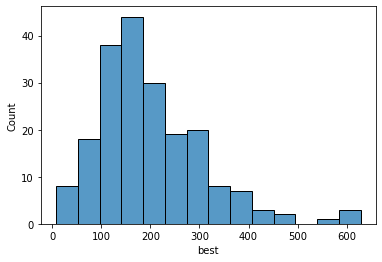

In [6]:
sns.histplot(df.best)

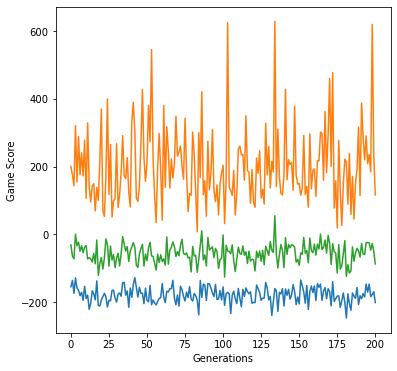

In [7]:
fig, ax = plt.subplots(figsize=(6, 6))

# add the plots for each dataframe
sns.lineplot(x='generations', y='worst', data=df)
sns.lineplot(x='generations', y='best', data=df)
sns.lineplot(x='generations', y='mean', data=df)
ax.set(ylabel='Game Score', xlabel='Generations')
plt.show()

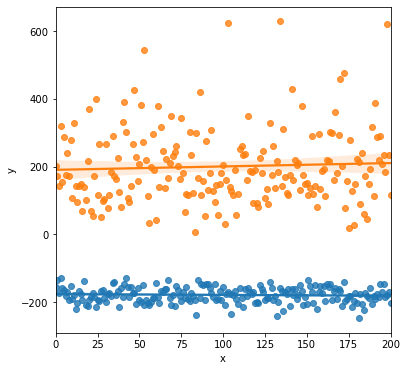

In [9]:

# create the figure and axes
fig, ax = plt.subplots(figsize=(6, 6))

# add the plots for each dataframe
sns.regplot(x='generations', y='worst', data=df, fit_reg=True)
sns.regplot(x='generations', y='best', data=df, fit_reg=True)
ax.set(ylabel='y', xlabel='x')
plt.show()

In [11]:
df.to_csv('100_geracoes_small_mutation.csv')